In [19]:
import os
import array


import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.time import Time
from scipy import signal
from numpy.random import random_sample

0.8038585209003215


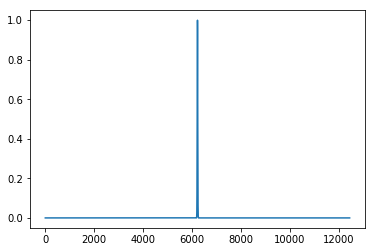

In [144]:
period_s = 1.244 # желаемая точность - до 5 знака
pulse = signal.gaussian(period_s*10e3, std=10, sym=True)
#window = np.array([random_sample(1)*random_sample(1)*i for i in window])
plt.plot(pulse)
print(1/period_s)

In [145]:
obser = []
for i in range(10):
    obser.append([])
    for j in range(10):
        obser[i].extend(random_sample(1)*pulse + np.random.normal(0, 0.05, len(pulse)))

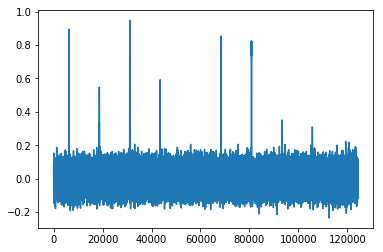

In [146]:
plt.close()
plt.plot(obser[1])
plt.show()

In [147]:
# Звездные сутки 86164,090530833 с

In [148]:
noised_obser = obser[1]
obs_points = len(noised_obser)
x = bin(obs_points)
x_high = '0b1' + '0'*(len(x[2:]))
add_points = int(x_high, 2) - obs_points
print(add_points, obs_points + add_points)
obs_points += add_points
noised_obser = np.append(noised_obser, np.zeros(add_points))

6672 131072


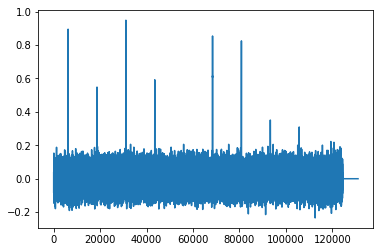

In [149]:
plt.close()
plt.plot(noised_obser)
plt.show()

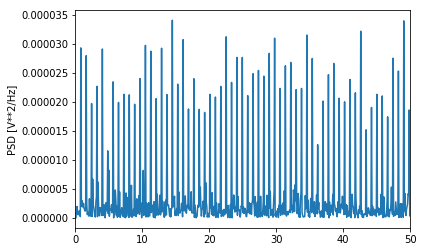

In [150]:
fs = 10e3 # частотота дискретизации временных рядов 
f, Pxx_den = signal.periodogram(obser[1], fs)
plt.plot(f, Pxx_den)
plt.ylabel('PSD [V**2/Hz]')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
plt.xlim(0, 50)
plt.show()

In [151]:
peaks, _ = signal.find_peaks(Pxx_den, height=0.5*max(Pxx_den))
main_harm = f[peaks][0]
for i in f[peaks][0:10]:
    print(i, i/main_harm)

0.8038585209003214 1.0
1.6077170418006428 2.0
2.411575562700964 3.0
3.2154340836012856 4.0
4.019292604501607 5.0
5.62700964630225 7.0
6.430868167202571 8.0
7.234726688102893 9.0
8.038585209003214 10.0
8.842443729903536 11.000000000000002


In [152]:
print(1/period_s)

0.8038585209003215


In [142]:
print(2/period_s)

1.607717041800643
